# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
## loading the numpy array and importing the different modules

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, pooling
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
## Loading images from mnist dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


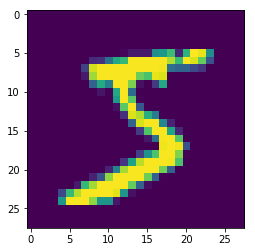

In [4]:
## Looking at the shape of the dataset

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
## Converting from 2D to 3D (Convolution won't accept 2D)

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
## Converting the datatype to float and normalize the data values to the range (0,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
## Checking the classes
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
## Model architecture

from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, (1,1), activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, (3,3), activation='relu'))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (1,1), activation='relu'))
model.add(Convolution2D(24, (3,3), activation='relu'))
model.add(Convolution2D(10, 2))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
## Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        1056      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 32)          1056      
__________

In [0]:
## Compile Model

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
## Fit the model on the training data

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.2052 - acc: 0.9367
Epoch 2/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0662 - acc: 0.9795
Epoch 3/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0499 - acc: 0.9847
Epoch 4/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0402 - acc: 0.9870
Epoch 5/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0346 - acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0316 - acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0271 - acc: 0.9913
Epoch 8/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0235 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0204 - acc: 0.9936
Epoch 10/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0201

In [0]:
## Evaluate the model on the test data

score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
## Print the accuracy

print(score)

[0.029501343462252406, 0.9911]


In [0]:
## Make the prediction on the test data

y_pred = model.predict(X_test)

In [17]:
## Print the predictions

print(y_pred[:9])
print(y_test[:9])

[[3.0049999e-10 7.9780133e-10 4.3538515e-09 2.7304963e-09 1.9369346e-14
  8.4269269e-10 5.3185575e-18 1.0000000e+00 1.0281353e-10 1.1826178e-11]
 [1.6523098e-08 1.4075511e-09 1.0000000e+00 2.8015689e-12 1.6041405e-14
  2.1530978e-13 6.8349371e-10 1.5916889e-12 4.7957066e-10 5.2856349e-16]
 [1.9347891e-10 9.9999404e-01 1.7588833e-09 5.7483845e-10 5.5405503e-06
  1.4317946e-07 2.7478881e-09 1.5011162e-07 9.0724612e-08 8.9178714e-10]
 [9.9060726e-01 2.1667561e-09 3.4025029e-06 1.2178384e-05 2.2927493e-07
  4.6317573e-06 9.1002332e-03 4.1287009e-07 2.6171005e-04 9.8486616e-06]
 [4.2834178e-12 5.8151876e-11 9.7924815e-13 2.6444805e-15 9.9999392e-01
  6.9321285e-14 1.7738703e-11 1.3788507e-08 1.3619853e-13 6.0467037e-06]
 [1.7596886e-09 9.9999595e-01 1.7791182e-08 2.4920543e-10 2.4560991e-06
  9.7316025e-08 3.5411276e-09 5.5318998e-07 9.7393047e-07 2.4769857e-09]
 [1.4001603e-16 1.5020349e-09 3.7713825e-11 2.2230073e-13 9.9999368e-01
  2.3892496e-10 1.4595393e-13 3.6095162e-07 6.3664038e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored